<a href="https://colab.research.google.com/github/farhadhsn8/Heart-Disease-Prediction-using-Machine-Learning/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# decision tree





In [ ]:
from numpy import genfromtxt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
dataset = genfromtxt('heart.csv', delimiter=',')
dataset = dataset[1:]
dataset.shape

(303, 14)

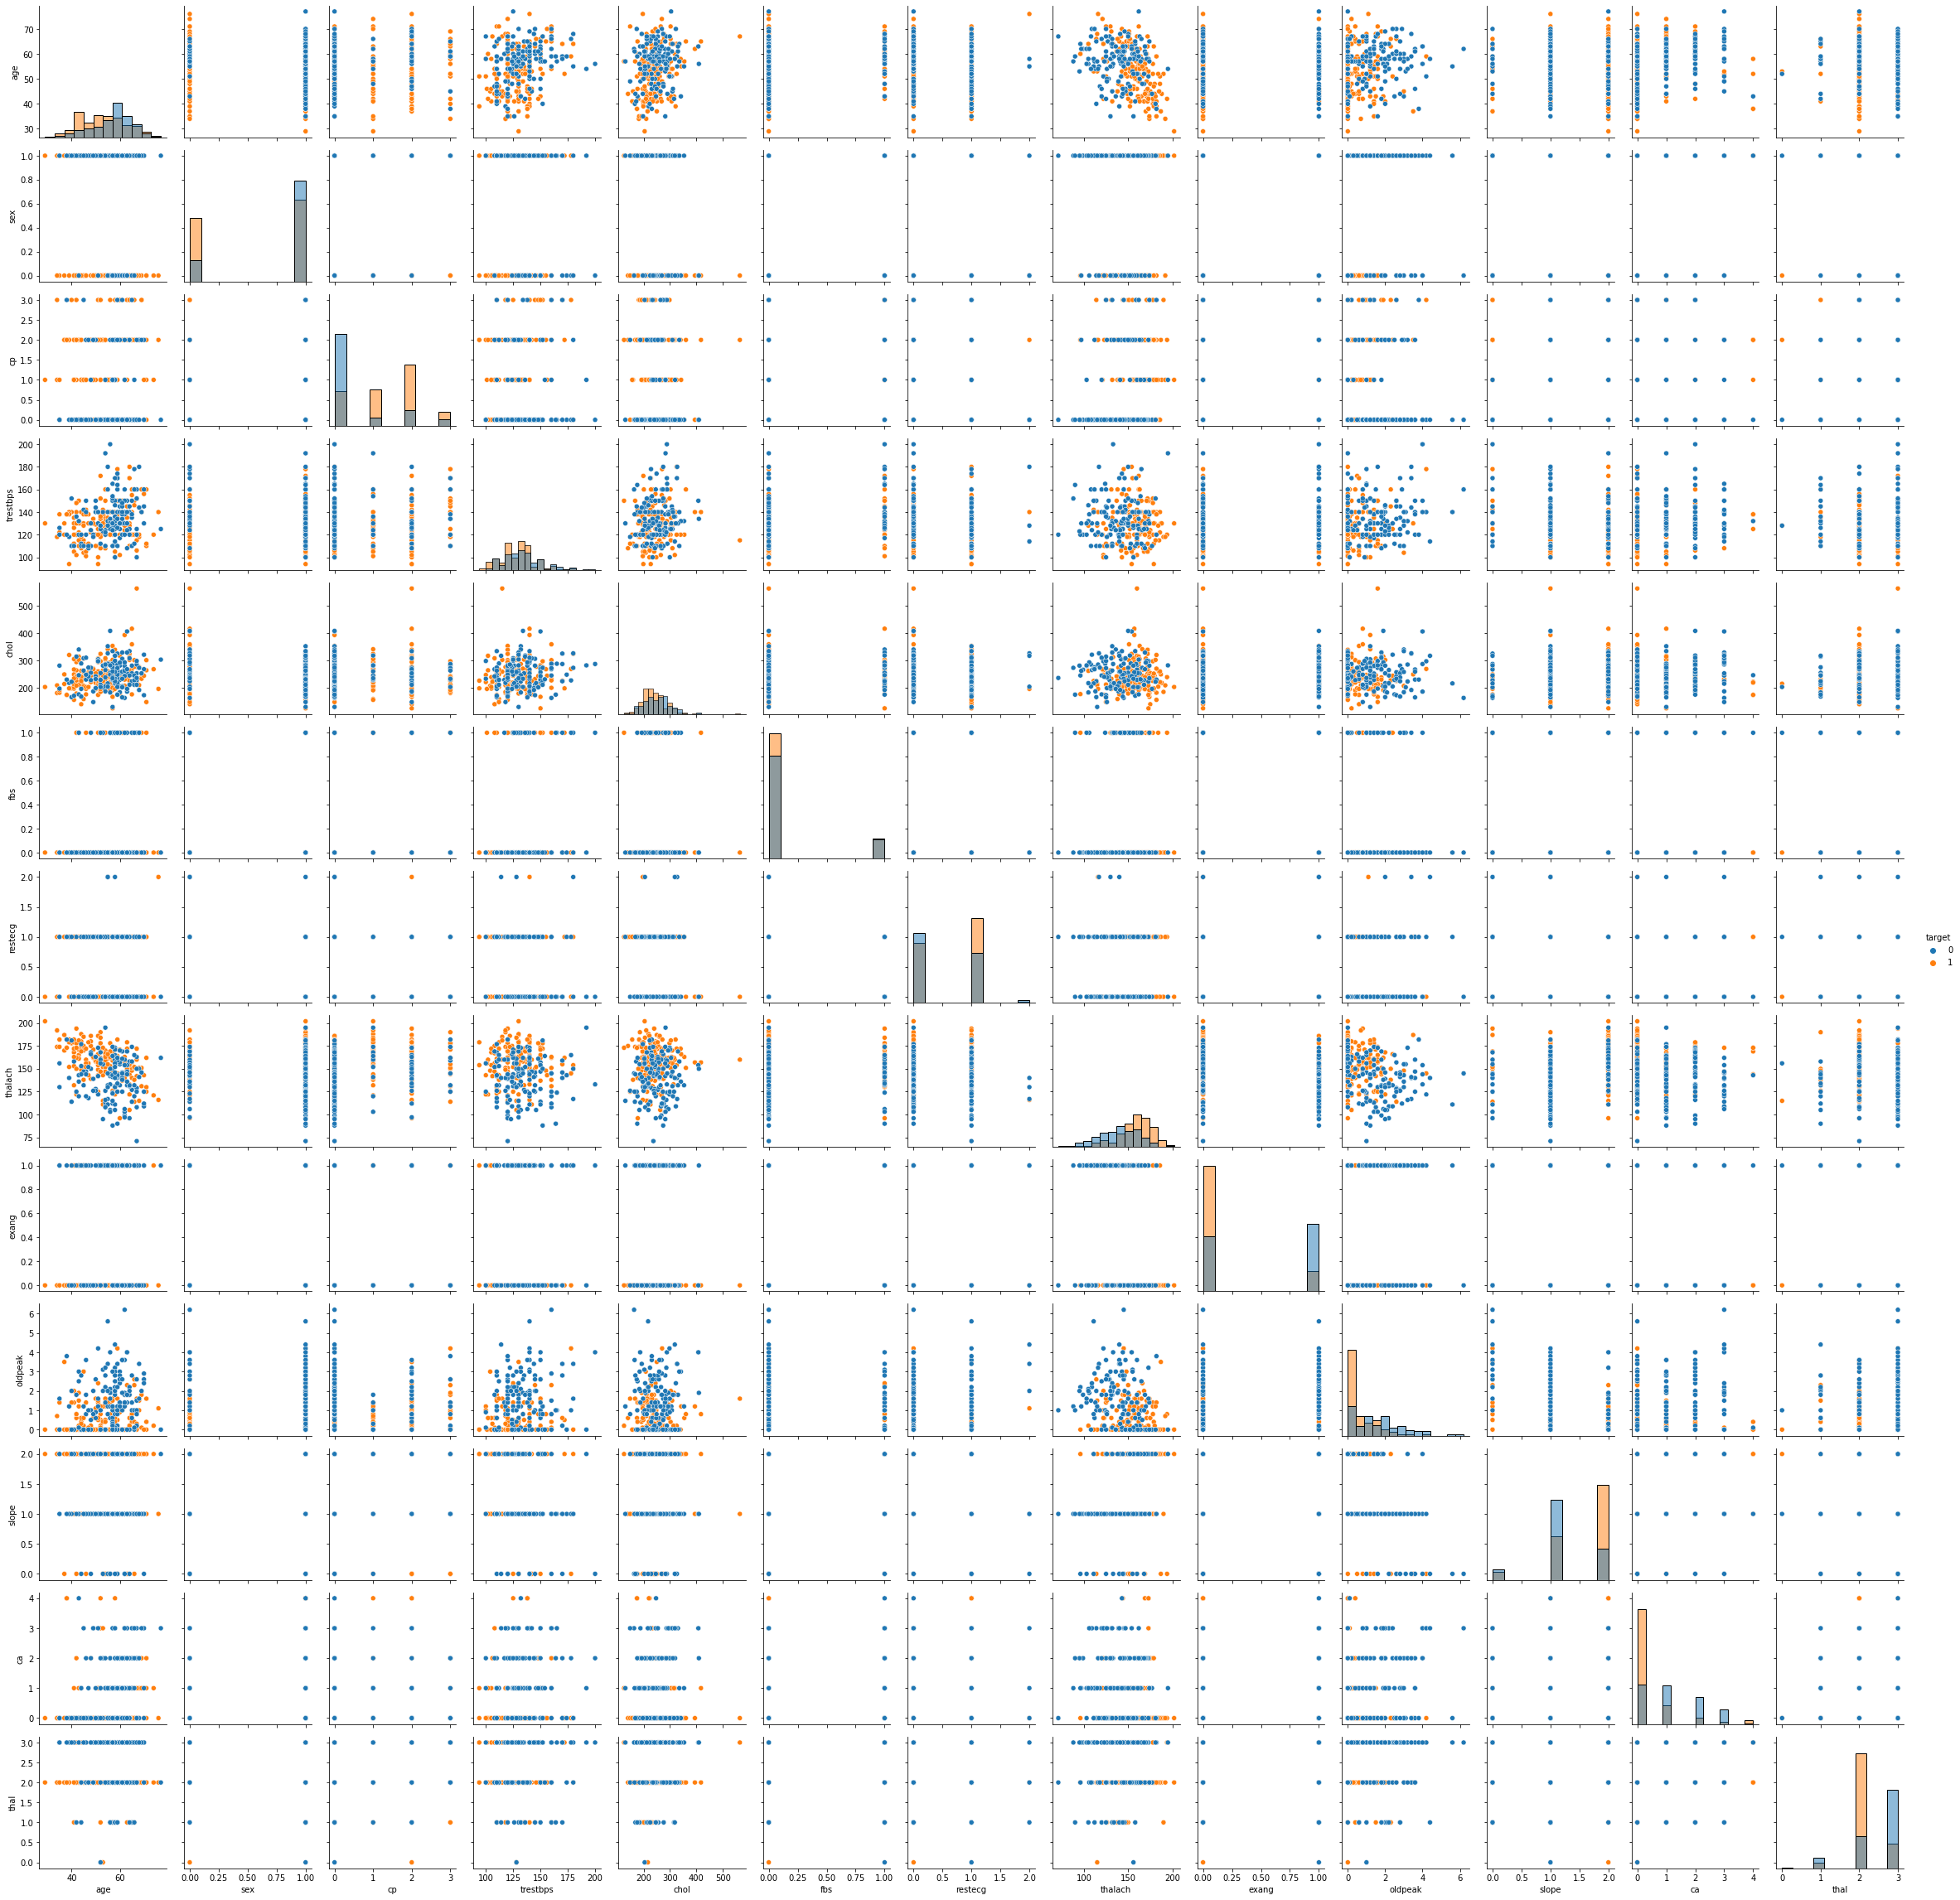

In [ ]:
heart = pd.read_csv('heart.csv')


g = sns.PairGrid(heart, hue="target")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [ ]:
# ---------K_FOLD CROSS VALIDATION --------------------
from sklearn import tree
X = dataset[:,0:-1]
Y = dataset[:,-1]

kf = KFold(n_splits=10 , random_state=None, shuffle=True) # ====> K = 10
kf.get_n_splits(X)
acc=[]


for train_index, test_index in kf.split(X):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X[train_index], Y[train_index])
    y_pred = clf.predict( X[test_index])
    cm = confusion_matrix(Y[test_index], y_pred)
    true = np.diag(cm)
    accuricy = np.sum(true)/np.sum(cm)
    acc.append(accuricy)

print('K_FOLD CROSS VALIDATION ACC IS : ',str( sum(acc) / len(acc) * 100 )+' % ' , '\n\n')

K_FOLD CROSS VALIDATION ACC IS :  78.86021505376344 %  




In [ ]:
def computeAccuricy(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)


  df_cm = pd.DataFrame(cm,['not disease','disease'],['not disease','disease'])
  plt.figure(figsize = (10,8))
  sns.heatmap(df_cm, annot=True)


  true = np.diag(cm)
  accuricy = np.sum(true)/np.sum(cm)
  precision = cm[ 1 , 1 ]/np.sum(cm[1])
  recall = cm[ 1 , 1 ]/np.sum(cm[: , 1])
  measure = (2 * recall * precision) / (recall + precision)
  print('accuricy : ',str(accuricy * 100 )+' % ' , '\n\n')
  print('precision : ',str(precision * 100 )+' % ' , '\n\n')
  print('recall : ',str(recall * 100 )+' % ' , '\n\n')
  print('F-measure : '  ,str(measure * 100 )+' % ' , '\n\n')

In [44]:
#---------------shuffle---------------------
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset.shape

#-------------test & train ---------------
train=dataset[0:280,:]    
test=dataset[280:,:]  
test.shape                #(23, 14)
train.shape              # (280, 14)

(280, 14)

In [45]:
from sklearn import tree
X = train[:,0:-1]
Y = train[:,-1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

accuricy :  100.0 %  


precision :  100.0 %  


recall :  100.0 %  


F-measure :  100.0 %  




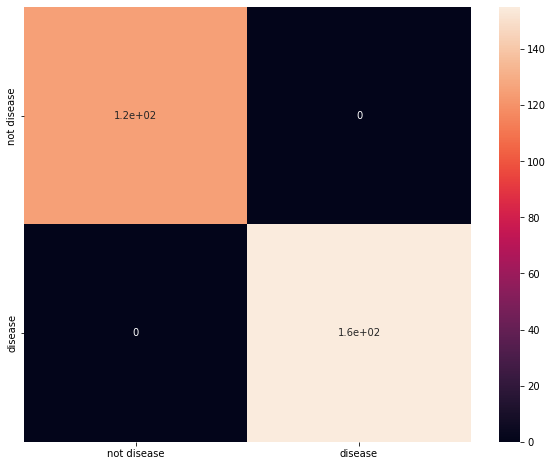

In [46]:
y_pred_train = clf.predict(train[:, 0:-1])
y_true_train = train[:,-1]

computeAccuricy( y_true_train , y_pred_train  )


accuricy :  86.95652173913044 %  


precision :  90.0 %  


recall :  81.81818181818183 %  


F-measure :  86.95652173913044 %  




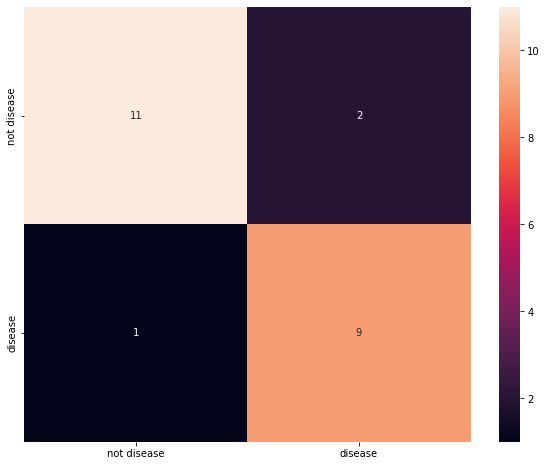

In [47]:
y_pred_test = clf.predict(test[:, 0:-1])
y_true_test = test[:,-1]

computeAccuricy(y_true_test , y_pred_test )